In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.2f}'.format

pd.set_option('display.max_columns',999)

In [2]:
#Open the csv file
df = pd.read_csv(r"C:\Users\sugiama\OneDrive - Manulife\Documents\Jupyter\Test1\trainbase.csv")
df

,id,creditlimit,n_cards,os_balance,os_billing,tot_cash_advance_trx,tot_retail_trx,remaining_unpaid_balance,branchcode,rasio_pembayaranpayment_ratio,overlimit_pct,payment_ration_3months,payment_ration_6months,deliquncy_score,good_bad_flag,loan_tenure,total_trx,remaining_statement_balance_per_n_cards,remaining_statement_balance_per_limit,total_trx_per_limit,tot_trx_3months_per_limit,tot_trx_6months_per_limit,utilization_Rate_3months,utilization_Rate_6months
0,20210100001,7000000,2,36158,23437,0,94,26323,I,102.19,0.00,74.78,100.00,0,0,15.42,94,13161.50,0.00,0.00,0.01,0.02,0.01,0.02
1,20210100002,10000000,2,268691,254564,0,1012,0,A,0.00,0.00,0.00,0.00,0,0,0.75,1012,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,20210100003,28000000,3,6769149,4159779,0,0,0,A,100.00,0.00,100.00,100.91,0,0,10.75,0,0.00,0.00,0.00,0.04,0.05,0.25,0.27
3,20210100004,21000000,4,3496732,111231,0,2536660,581334,G,100.00,0.00,25.01,22.64,0,0,19.75,2536660,145333.50,0.03,0.12,0.06,0.02,0.10,0.35
4,20210100005,10000000,2,9402085,6099283,0,2666558,5951865,A,95.99,0.00,97.49,99.84,0,0,1.67,2666558,2975932.50,0.60,0.27,0.32,0.13,0.71,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13165,20210115489,20000000,2,20743090,20527879,0,295000,14769911,A,0.00,0.68,11.80,9.67,0,0,1.00,295000,7384956.00,0.74,0.01,0.06,0.03,1.02,1.01
13166,20210115490,17000000,2,3855317,3160704,0,269998,0,A,100.00,0.00,75.00,203.00,0,0,9.33,269998,0.00,0.00,0.02,0.14,0.07,0.21,0.16
13167,20210115491,6000000,2,62162,41120,0,238,0,A,100.00,0.00,100.00,133.00,0,0,2.00,238,0.00,0.00,0.00,0.00,0.34,0.01,0.11
13168,20210115492,4000000,3,264597,252864,0,1018,246512,I,102.00,0.00,62.40,6.72,0,0,3.83,1018,82171.00,0.06,0.00,0.00,0.27,0.33,0.65


In [3]:
#Drop the duplicates
df = df.drop_duplicates()
df

,id,creditlimit,n_cards,os_balance,os_billing,tot_cash_advance_trx,tot_retail_trx,remaining_unpaid_balance,branchcode,rasio_pembayaranpayment_ratio,overlimit_pct,payment_ration_3months,payment_ration_6months,deliquncy_score,good_bad_flag,loan_tenure,total_trx,remaining_statement_balance_per_n_cards,remaining_statement_balance_per_limit,total_trx_per_limit,tot_trx_3months_per_limit,tot_trx_6months_per_limit,utilization_Rate_3months,utilization_Rate_6months
0,20210100001,7000000,2,36158,23437,0,94,26323,I,102.19,0.00,74.78,100.00,0,0,15.42,94,13161.50,0.00,0.00,0.01,0.02,0.01,0.02
1,20210100002,10000000,2,268691,254564,0,1012,0,A,0.00,0.00,0.00,0.00,0,0,0.75,1012,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,20210100003,28000000,3,6769149,4159779,0,0,0,A,100.00,0.00,100.00,100.91,0,0,10.75,0,0.00,0.00,0.00,0.04,0.05,0.25,0.27
3,20210100004,21000000,4,3496732,111231,0,2536660,581334,G,100.00,0.00,25.01,22.64,0,0,19.75,2536660,145333.50,0.03,0.12,0.06,0.02,0.10,0.35
4,20210100005,10000000,2,9402085,6099283,0,2666558,5951865,A,95.99,0.00,97.49,99.84,0,0,1.67,2666558,2975932.50,0.60,0.27,0.32,0.13,0.71,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13165,20210115489,20000000,2,20743090,20527879,0,295000,14769911,A,0.00,0.68,11.80,9.67,0,0,1.00,295000,7384956.00,0.74,0.01,0.06,0.03,1.02,1.01
13166,20210115490,17000000,2,3855317,3160704,0,269998,0,A,100.00,0.00,75.00,203.00,0,0,9.33,269998,0.00,0.00,0.02,0.14,0.07,0.21,0.16
13167,20210115491,6000000,2,62162,41120,0,238,0,A,100.00,0.00,100.00,133.00,0,0,2.00,238,0.00,0.00,0.00,0.00,0.34,0.01,0.11
13168,20210115492,4000000,3,264597,252864,0,1018,246512,I,102.00,0.00,62.40,6.72,0,0,3.83,1018,82171.00,0.06,0.00,0.00,0.27,0.33,0.65


In [4]:
# Standardize column names: all lowercase, words separated by underscores, no abbreviations
df = df.rename(columns={
    "id": "ID",
    "creditlimit": "credit_limit",
    "os_balance": "outstanding_balance",
    "os_billing": "outstanding_billing",
    "branchcode": "branch_code",
    "rasio_pembayaranpayment_ratio": "payment_ratio",
    "payment_ration_3months": "payment_ratio_3months",
    "payment_ration_6months": "payment_ratio_6months",
    "deliquncy_score": "delinquency_score",
    "remaining_statement_balance_per_n_cards": "remaining_statement_balance_per_card",
    "remaining_statement_balance_per_limit": "remaining_statement_balance_per_limit",
    "total_trx_per_limit": "total_transactions_per_limit",
    "utilization_Rate_3months": "utilization_rate_3months",
    "utilization_Rate_6months": "utilization_rate_6months"
})
df

,ID,credit_limit,n_cards,outstanding_balance,outstanding_billing,tot_cash_advance_trx,tot_retail_trx,remaining_unpaid_balance,branch_code,payment_ratio,overlimit_pct,payment_ratio_3months,payment_ratio_6months,delinquency_score,good_bad_flag,loan_tenure,total_trx,remaining_statement_balance_per_card,remaining_statement_balance_per_limit,total_transactions_per_limit,tot_trx_3months_per_limit,tot_trx_6months_per_limit,utilization_rate_3months,utilization_rate_6months
0,20210100001,7000000,2,36158,23437,0,94,26323,I,102.19,0.00,74.78,100.00,0,0,15.42,94,13161.50,0.00,0.00,0.01,0.02,0.01,0.02
1,20210100002,10000000,2,268691,254564,0,1012,0,A,0.00,0.00,0.00,0.00,0,0,0.75,1012,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,20210100003,28000000,3,6769149,4159779,0,0,0,A,100.00,0.00,100.00,100.91,0,0,10.75,0,0.00,0.00,0.00,0.04,0.05,0.25,0.27
3,20210100004,21000000,4,3496732,111231,0,2536660,581334,G,100.00,0.00,25.01,22.64,0,0,19.75,2536660,145333.50,0.03,0.12,0.06,0.02,0.10,0.35
4,20210100005,10000000,2,9402085,6099283,0,2666558,5951865,A,95.99,0.00,97.49,99.84,0,0,1.67,2666558,2975932.50,0.60,0.27,0.32,0.13,0.71,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13165,20210115489,20000000,2,20743090,20527879,0,295000,14769911,A,0.00,0.68,11.80,9.67,0,0,1.00,295000,7384956.00,0.74,0.01,0.06,0.03,1.02,1.01
13166,20210115490,17000000,2,3855317,3160704,0,269998,0,A,100.00,0.00,75.00,203.00,0,0,9.33,269998,0.00,0.00,0.02,0.14,0.07,0.21,0.16
13167,20210115491,6000000,2,62162,41120,0,238,0,A,100.00,0.00,100.00,133.00,0,0,2.00,238,0.00,0.00,0.00,0.00,0.34,0.01,0.11
13168,20210115492,4000000,3,264597,252864,0,1018,246512,I,102.00,0.00,62.40,6.72,0,0,3.83,1018,82171.00,0.06,0.00,0.00,0.27,0.33,0.65


## EDA and Data Cleaning

In [5]:
df.describe()

,ID,credit_limit,n_cards,outstanding_balance,outstanding_billing,tot_cash_advance_trx,tot_retail_trx,remaining_unpaid_balance,payment_ratio,overlimit_pct,payment_ratio_3months,payment_ratio_6months,delinquency_score,good_bad_flag,loan_tenure,total_trx,remaining_statement_balance_per_card,remaining_statement_balance_per_limit,total_transactions_per_limit,tot_trx_3months_per_limit,tot_trx_6months_per_limit,utilization_rate_3months,utilization_rate_6months
count,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00,13170.00
mean,20210107750.68,20700037.97,2.50,11605846.47,8115265.18,72737.73,2006181.79,8181806.62,65.80,3.36,53.79,84.21,0.00,0.09,6.65,2078943.63,2974594.40,0.47,0.11,0.17,0.20,0.57,0.54
std,4474.68,29577031.65,1.01,23787632.19,17714762.59,581212.35,7723782.92,19256545.12,855.44,9.18,1354.15,1354.42,0.11,0.28,4.69,7830487.38,6154700.94,0.48,0.20,0.19,0.28,0.42,0.44
min,20210100001.00,3000000.00,1.00,0.00,20043.00,0.00,-15667200.00,0.00,-18138.00,0.00,-57792.34,-77056.00,0.00,0.00,0.75,-15667200.00,0.00,0.00,-0.63,-0.13,-0.57,0.00,0.00
25%,20210103873.25,5000000.00,2.00,1998926.50,814726.00,0.00,0.00,0.00,0.00,0.00,19.91,21.17,0.00,0.00,2.92,0.00,0.00,0.00,0.00,0.04,0.03,0.19,0.15
50%,20210107741.50,9000000.00,2.00,4705553.00,3154396.00,0.00,204081.50,2753848.00,26.60,0.00,50.00,65.10,0.00,0.00,5.67,248000.00,1213083.75,0.35,0.02,0.11,0.12,0.58,0.50
75%,20210111633.75,22000000.00,3.00,10648402.00,7464537.00,0.00,1412832.75,7185789.00,100.00,1.24,90.95,100.00,0.00,0.00,9.33,1526873.50,3129634.50,0.94,0.13,0.24,0.29,0.92,0.87
max,20210115493.00,1000000000.00,16.00,798058574.00,628000000.00,28733412.00,285000000.00,444000000.00,68983.00,190.00,75575.00,54899.00,5.00,1.00,34.42,314000000.00,148000000.00,7.24,4.60,3.18,8.11,8.13,9.73


In [6]:
df_cleaned = df.copy()

In [7]:
df_cleaned.isnull().sum() #86 found null branch codes

ID                                        0
credit_limit                              0
n_cards                                   0
outstanding_balance                       0
outstanding_billing                       0
tot_cash_advance_trx                      0
tot_retail_trx                            0
remaining_unpaid_balance                  0
branch_code                              86
payment_ratio                             0
overlimit_pct                             0
payment_ratio_3months                     0
payment_ratio_6months                     0
delinquency_score                         0
good_bad_flag                             0
loan_tenure                               0
total_trx                                 0
remaining_statement_balance_per_card      0
remaining_statement_balance_per_limit     0
total_transactions_per_limit              0
tot_trx_3months_per_limit                 0
tot_trx_6months_per_limit                 0
utilization_rate_3months        

In [8]:
df_cleaned.dropna(subset=['branch_code'], inplace=True)

In [9]:
#Removing negative values

non_neg_cols = [
    "ID",
    "credit_limit",
    "n_cards",
    "outstanding_balance",
    "outstanding_billing",
    "tot_cash_advance_trx",
    "tot_retail_trx",
    "remaining_unpaid_balance",
    "payment_ratio",
    "overlimit_pct",
    "payment_ratio_3months",
    "payment_ratio_6months",
    "delinquency_score",
    "good_bad_flag",
    "loan_tenure",
    "total_trx",
    "remaining_statement_balance_per_card",
    "remaining_statement_balance_per_limit",
    "total_transactions_per_limit",
    "tot_trx_3months_per_limit",
    "tot_trx_6months_per_limit",
    "utilization_rate_3months",
    "utilization_rate_6months"
]

df_cleaned [non_neg_cols] = df_cleaned[non_neg_cols].clip(lower=0)

In [10]:
df_cleaned.describe()

,ID,credit_limit,n_cards,outstanding_balance,outstanding_billing,tot_cash_advance_trx,tot_retail_trx,remaining_unpaid_balance,payment_ratio,overlimit_pct,payment_ratio_3months,payment_ratio_6months,delinquency_score,good_bad_flag,loan_tenure,total_trx,remaining_statement_balance_per_card,remaining_statement_balance_per_limit,total_transactions_per_limit,tot_trx_3months_per_limit,tot_trx_6months_per_limit,utilization_rate_3months,utilization_rate_6months
count,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00,13084.00
mean,20210107747.71,20681099.05,2.50,11612416.38,8126943.72,72554.72,2007056.73,8190640.87,69.01,3.37,81.67,100.75,0.00,0.09,6.66,2079635.71,2975627.65,0.47,0.11,0.17,0.20,0.57,0.54
std,4475.54,29591119.36,1.01,23832072.37,17753606.57,580920.45,7724175.46,19287460.18,839.98,9.19,855.21,949.97,0.11,0.28,4.70,7831357.71,6158096.86,0.48,0.20,0.19,0.28,0.42,0.44
min,20210100001.00,3000000.00,1.00,0.00,20043.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20210103866.75,5000000.00,2.00,2002321.00,814442.00,0.00,0.00,0.00,0.00,0.00,19.90,21.14,0.00,0.00,2.92,0.00,0.00,0.00,0.00,0.04,0.03,0.19,0.15
50%,20210107737.50,9000000.00,2.00,4714649.00,3159094.50,0.00,204900.00,2766777.00,26.50,0.00,50.00,65.20,0.00,0.00,5.67,249000.00,1215896.00,0.35,0.02,0.11,0.12,0.58,0.50
75%,20210111633.25,22000000.00,3.00,10599162.25,7464537.00,0.00,1408774.50,7188500.00,100.00,1.27,90.70,100.00,0.00,0.00,9.42,1523167.50,3130175.00,0.94,0.13,0.24,0.29,0.92,0.87
max,20210115493.00,1000000000.00,16.00,798058574.00,628000000.00,28733412.00,285000000.00,444000000.00,68983.00,190.00,75575.00,54899.00,5.00,1.00,34.42,314000000.00,148000000.00,7.24,4.60,3.18,8.11,8.13,9.73


In [11]:
over_limit_rows = df_cleaned[df_cleaned["remaining_statement_balance_per_limit"] > 1]
count_over_limit = len(over_limit_rows)
print(count_over_limit)

over_limit_rows = df_cleaned[df_cleaned["utilization_rate_3months"] > 1]
count_over_limit = len(over_limit_rows)
print(count_over_limit)


2549
2148


## Feature Engineering

In [12]:
df_cleaned.drop(columns=['ID', 'branch_code', 'good_bad_flag']).corr()

,credit_limit,n_cards,outstanding_balance,outstanding_billing,tot_cash_advance_trx,tot_retail_trx,remaining_unpaid_balance,payment_ratio,overlimit_pct,payment_ratio_3months,payment_ratio_6months,delinquency_score,loan_tenure,total_trx,remaining_statement_balance_per_card,remaining_statement_balance_per_limit,total_transactions_per_limit,tot_trx_3months_per_limit,tot_trx_6months_per_limit,utilization_rate_3months,utilization_rate_6months
credit_limit,1.00,0.44,0.71,0.62,0.07,0.38,0.50,0.01,-0.00,0.00,0.16,-0.01,0.35,0.38,0.42,-0.11,-0.03,-0.07,-0.05,-0.11,-0.12
n_cards,0.44,1.00,0.38,0.35,0.06,0.21,0.31,0.00,0.05,0.01,0.01,-0.01,0.39,0.21,0.12,0.03,0.01,0.01,0.02,0.05,0.03
outstanding_balance,0.71,0.38,1.00,0.87,0.17,0.50,0.82,-0.00,0.24,-0.01,0.08,-0.02,0.21,0.50,0.73,0.24,0.10,0.15,0.15,0.31,0.22
outstanding_billing,0.62,0.35,0.87,1.00,0.16,0.29,0.83,-0.01,0.26,-0.01,0.15,-0.02,0.18,0.30,0.74,0.31,0.01,0.14,0.15,0.33,0.24
tot_cash_advance_trx,0.07,0.06,0.17,0.16,1.00,0.15,0.16,-0.00,0.04,-0.00,-0.00,-0.01,0.01,0.22,0.13,0.07,0.14,0.04,0.02,0.08,0.05
tot_retail_trx,0.38,0.21,0.50,0.29,0.15,1.00,0.19,0.01,0.03,0.01,0.02,-0.01,0.11,1.00,0.13,-0.06,0.49,0.19,0.08,0.01,-0.04
remaining_unpaid_balance,0.50,0.31,0.82,0.83,0.16,0.19,1.00,-0.02,0.28,-0.02,0.04,-0.02,0.18,0.20,0.91,0.44,-0.03,0.07,0.13,0.36,0.28
payment_ratio,0.01,0.00,-0.00,-0.01,-0.00,0.01,-0.02,1.00,-0.02,0.26,0.10,-0.00,0.01,0.01,-0.02,-0.05,0.01,0.02,0.01,-0.03,-0.02
overlimit_pct,-0.00,0.05,0.24,0.26,0.04,0.03,0.28,-0.02,1.00,-0.00,0.04,-0.01,-0.02,0.03,0.29,0.51,0.05,0.24,0.26,0.51,0.40
payment_ratio_3months,0.00,0.01,-0.01,-0.01,-0.00,0.01,-0.02,0.26,-0.00,1.00,0.33,-0.00,0.01,0.01,-0.02,-0.05,0.05,0.05,0.04,-0.02,-0.01


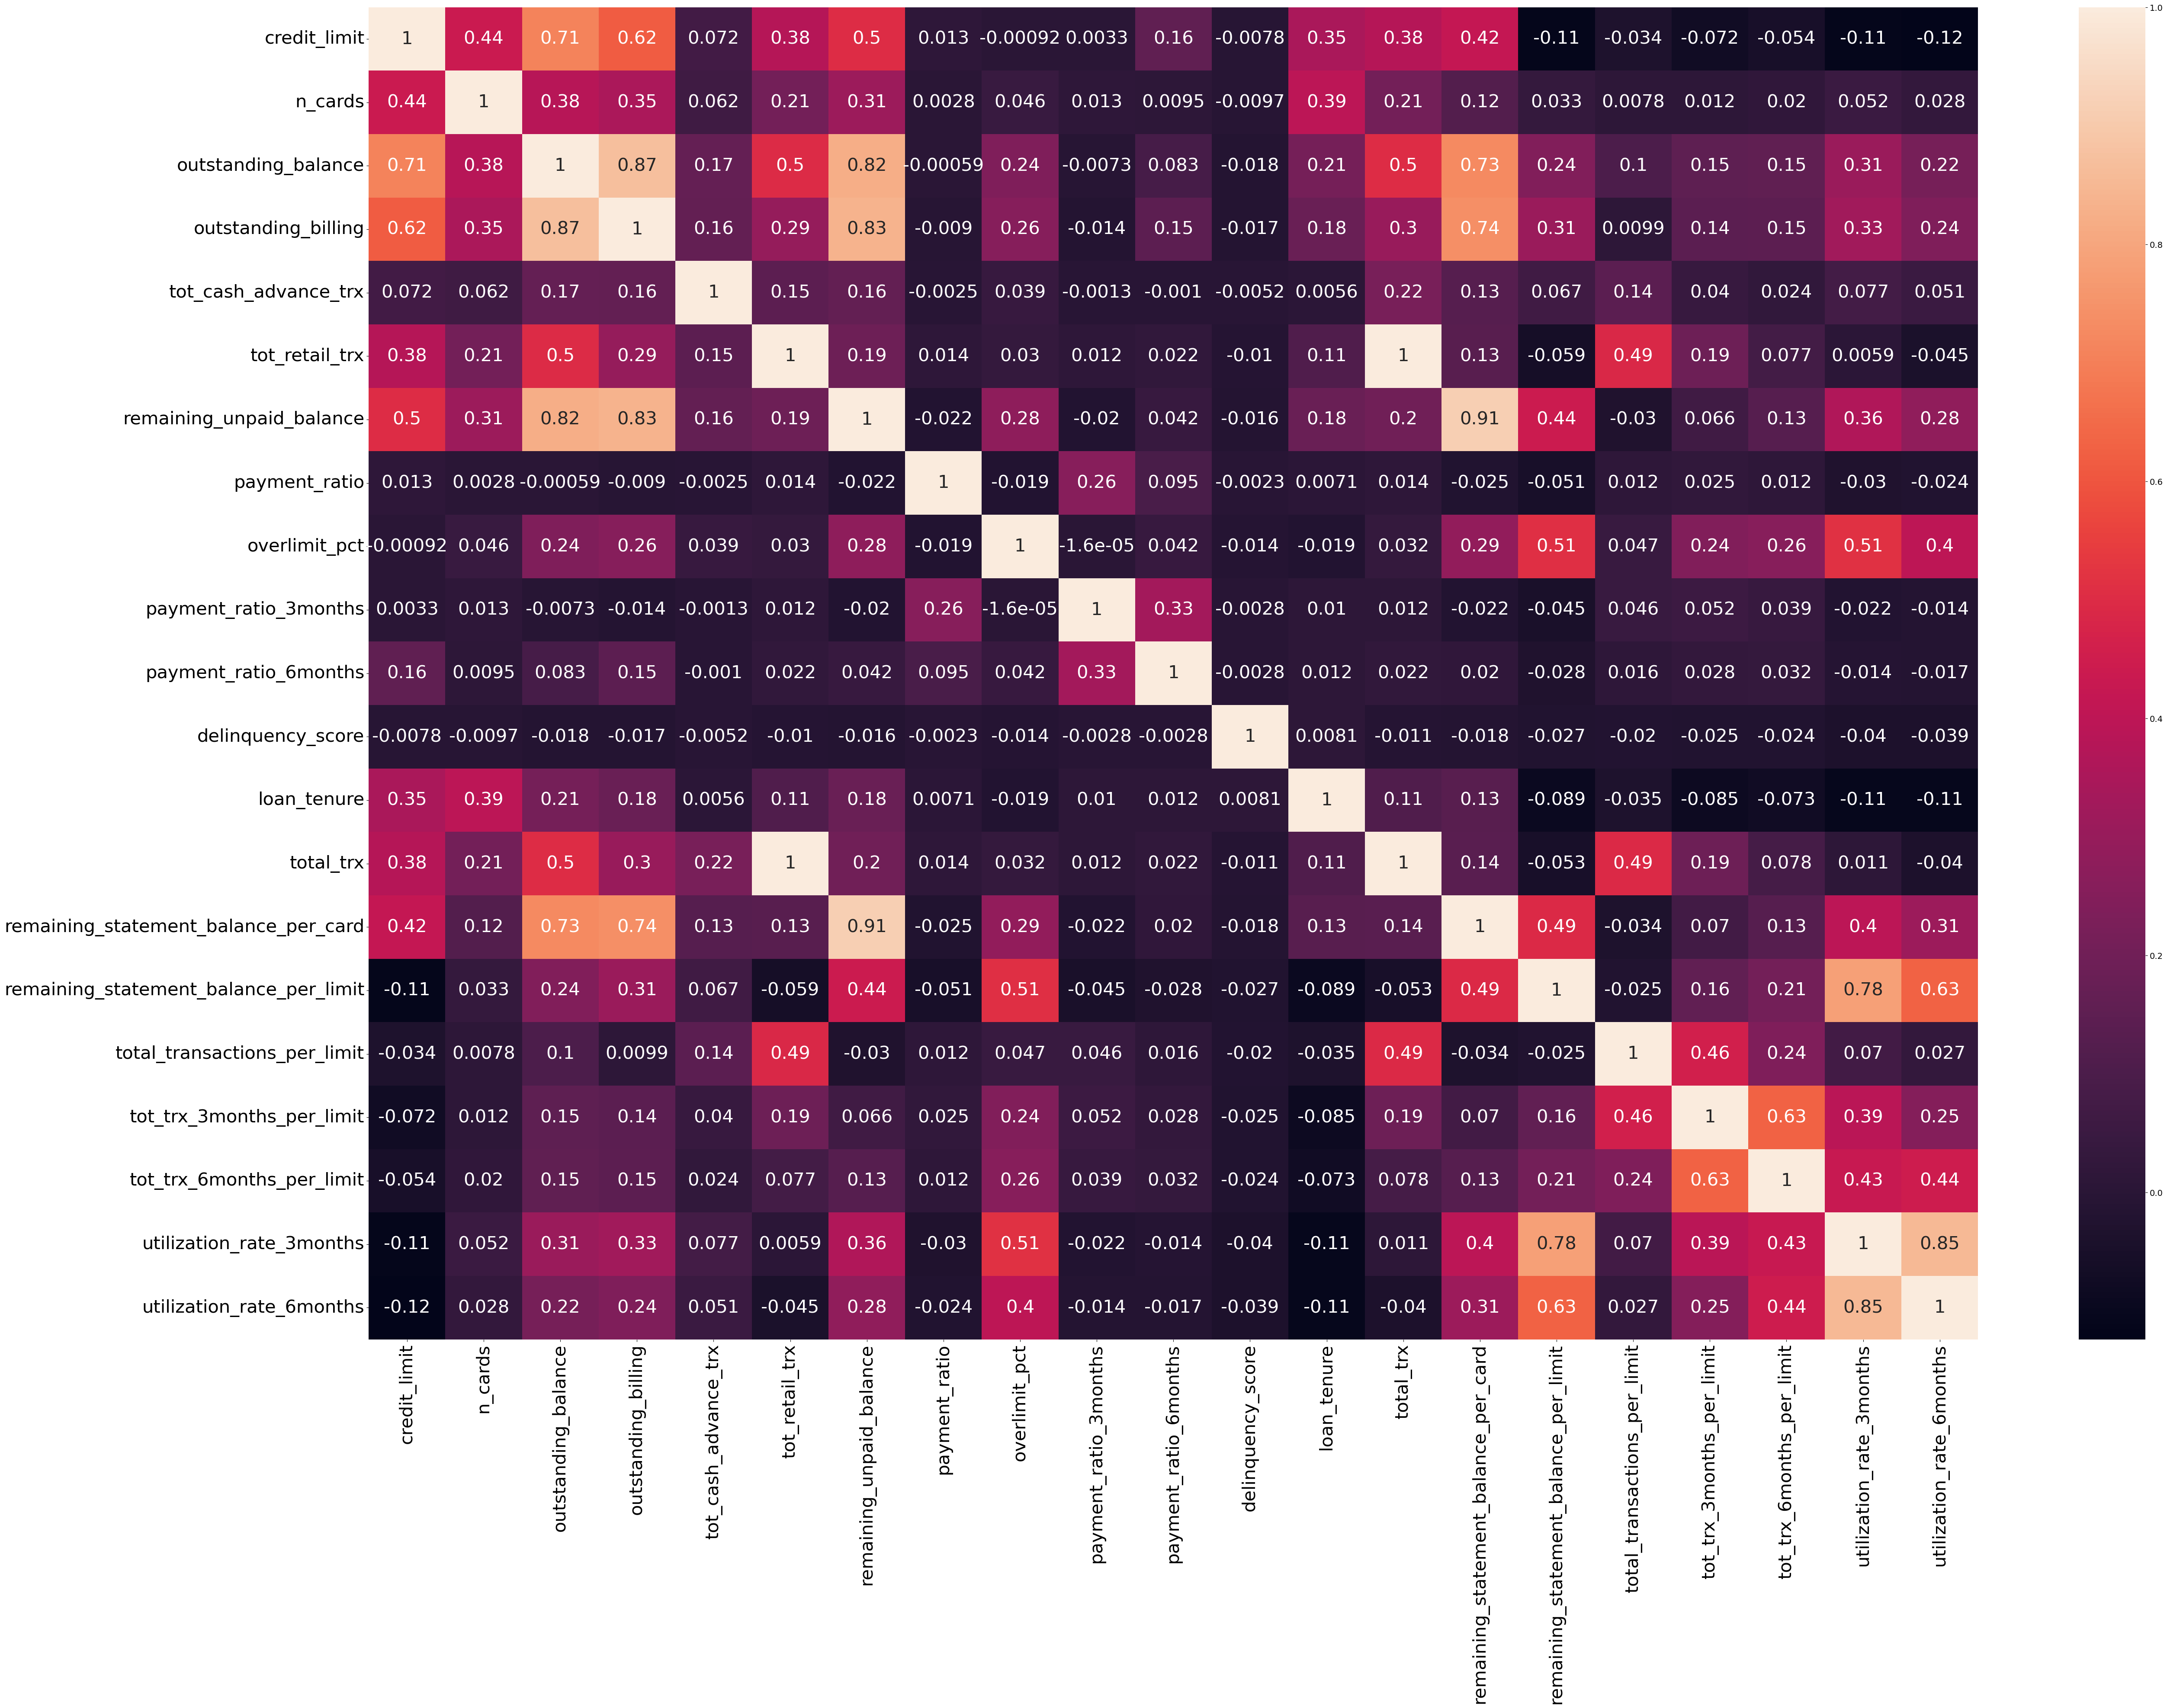

In [53]:
sns.heatmap(df_cleaned.drop(columns=['ID', 'branch_code', 'good_bad_flag']).corr(), annot=True)

#Run this one twice
plt.rcParams['figure.figsize'] = (60,40)
plt.rcParams['font.size'] = 30

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


plt.show()

In [14]:
df_agg = df_cleaned.copy()

In [15]:
df_agg["tot_outstanding_bill"] = df_agg["outstanding_balance"] + df_agg["outstanding_billing"]

In [16]:
df_agg["payment_ratio_avg"] = df_agg[["payment_ratio", "payment_ratio_3months", "payment_ratio_6months"]].mean(axis=1)

In [17]:
df_agg["util_rate"] = df_agg[["utilization_rate_3months", "utilization_rate_6months"]].mean(axis=1)

In [18]:
df_agg

,ID,credit_limit,n_cards,outstanding_balance,outstanding_billing,tot_cash_advance_trx,tot_retail_trx,remaining_unpaid_balance,branch_code,payment_ratio,overlimit_pct,payment_ratio_3months,payment_ratio_6months,delinquency_score,good_bad_flag,loan_tenure,total_trx,remaining_statement_balance_per_card,remaining_statement_balance_per_limit,total_transactions_per_limit,tot_trx_3months_per_limit,tot_trx_6months_per_limit,utilization_rate_3months,utilization_rate_6months,tot_outstanding_bill,payment_ratio_avg,util_rate
0,20210100001,7000000,2,36158,23437,0,94,26323,I,102.19,0.00,74.78,100.00,0,0,15.42,94,13161.50,0.00,0.00,0.01,0.02,0.01,0.02,59595,92.32,0.02
1,20210100002,10000000,2,268691,254564,0,1012,0,A,0.00,0.00,0.00,0.00,0,0,0.75,1012,0.00,0.00,0.00,0.00,0.00,0.00,0.00,523255,0.00,0.00
2,20210100003,28000000,3,6769149,4159779,0,0,0,A,100.00,0.00,100.00,100.91,0,0,10.75,0,0.00,0.00,0.00,0.04,0.05,0.25,0.27,10928928,100.30,0.26
3,20210100004,21000000,4,3496732,111231,0,2536660,581334,G,100.00,0.00,25.01,22.64,0,0,19.75,2536660,145333.50,0.03,0.12,0.06,0.02,0.10,0.35,3607963,49.22,0.22
4,20210100005,10000000,2,9402085,6099283,0,2666558,5951865,A,95.99,0.00,97.49,99.84,0,0,1.67,2666558,2975932.50,0.60,0.27,0.32,0.13,0.71,0.34,15501368,97.77,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13165,20210115489,20000000,2,20743090,20527879,0,295000,14769911,A,0.00,0.68,11.80,9.67,0,0,1.00,295000,7384956.00,0.74,0.01,0.06,0.03,1.02,1.01,41270969,7.16,1.02
13166,20210115490,17000000,2,3855317,3160704,0,269998,0,A,100.00,0.00,75.00,203.00,0,0,9.33,269998,0.00,0.00,0.02,0.14,0.07,0.21,0.16,7016021,126.00,0.19
13167,20210115491,6000000,2,62162,41120,0,238,0,A,100.00,0.00,100.00,133.00,0,0,2.00,238,0.00,0.00,0.00,0.00,0.34,0.01,0.11,103282,111.00,0.06
13168,20210115492,4000000,3,264597,252864,0,1018,246512,I,102.00,0.00,62.40,6.72,0,0,3.83,1018,82171.00,0.06,0.00,0.00,0.27,0.33,0.65,517461,57.04,0.49


In [19]:
df_agg["total_trx_per_limit"] = df_agg[["total_transactions_per_limit", "tot_trx_3months_per_limit", "tot_trx_6months_per_limit"]].mean(axis=1)

In [20]:
cols_keep = ["credit_limit", "tot_outstanding_bill", "tot_cash_advance_trx", "remaining_unpaid_balance", "payment_ratio_avg", "total_trx_per_limit", 
             "util_rate", "delinquency_score", "loan_tenure"]

df_agg = df_agg[cols_keep]

In [21]:
df_agg.head(10)

,credit_limit,tot_outstanding_bill,tot_cash_advance_trx,remaining_unpaid_balance,payment_ratio_avg,total_trx_per_limit,util_rate,delinquency_score,loan_tenure
0,7000000,59595,0,26323,92.32,0.01,0.02,0,15.42
1,10000000,523255,0,0,0.00,0.00,0.00,0,0.75
2,28000000,10928928,0,0,100.30,0.03,0.26,0,10.75
3,21000000,3607963,0,581334,49.22,0.06,0.22,0,19.75
4,10000000,15501368,0,5951865,97.77,0.24,0.52,0,1.67
5,80000000,8308687,0,4613435,23.50,0.06,0.11,0,10.25
6,4000000,5949972,0,3314046,20.44,0.08,1.00,0,4.67
7,20000000,13226865,0,7881069,110.15,0.32,0.24,0,0.75
8,84000000,68146667,0,0,100.00,0.24,0.31,0,14.50
9,23000000,7614714,0,0,64.55,0.02,0.42,0,10.67


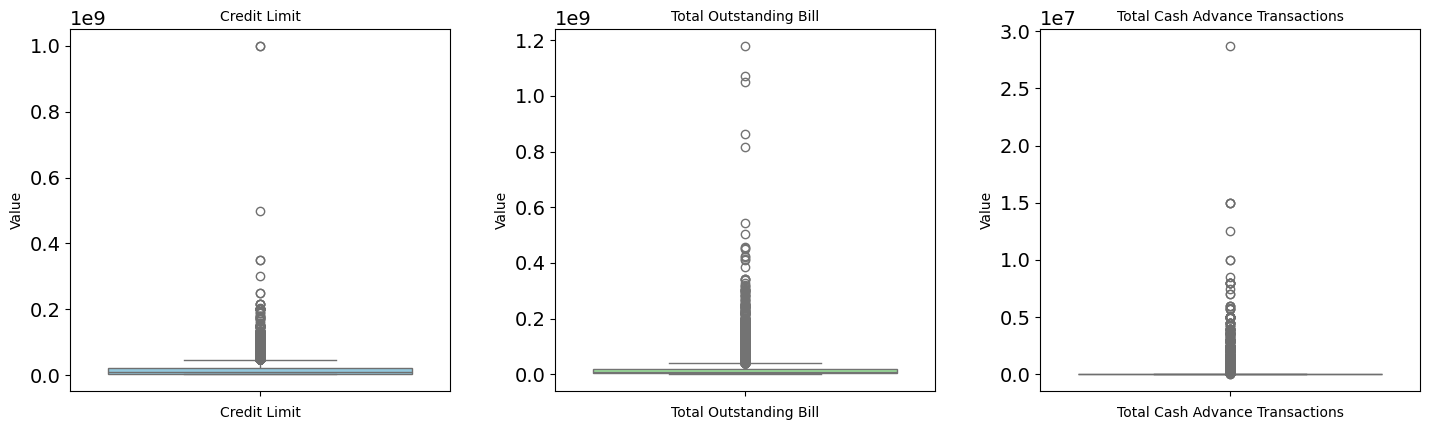

In [22]:
plt.figure(figsize=(15, 5))
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# 1. Credit Limit
plt.subplot(1, 3, 1)
sns.boxplot(data=df_agg['credit_limit'], color='skyblue')
plt.title('Credit Limit', fontsize=10)
plt.xlabel('Credit Limit', fontsize=10)
plt.ylabel('Value', fontsize=10)

# 2. Total Outstanding Bill
plt.subplot(1, 3, 2)
sns.boxplot(data=df_agg['tot_outstanding_bill'], color='lightgreen')
plt.title('Total Outstanding Bill', fontsize=10)
plt.xlabel('Total Outstanding Bill', fontsize=10)
plt.ylabel('Value', fontsize=10)

# 3. Total Cash Advance Transactions
plt.subplot(1, 3, 3)
sns.boxplot(data=df_agg['tot_cash_advance_trx'], color='lightcoral')
plt.title('Total Cash Advance Transactions', fontsize=10)
plt.xlabel('Total Cash Advance Transactions', fontsize=10)
plt.ylabel('Value', fontsize=10)

plt.tight_layout()
plt.show()


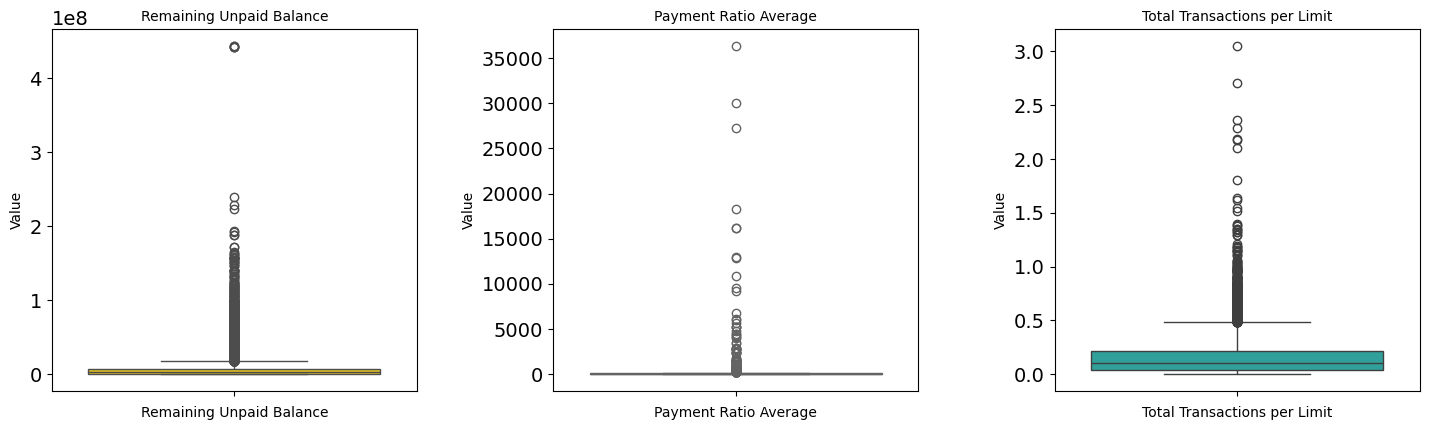

In [23]:
plt.figure(figsize=(15, 5))
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# 1. Remaining Unpaid Balance
plt.subplot(1, 3, 1)
sns.boxplot(data=df_agg['remaining_unpaid_balance'], color='gold')
plt.title('Remaining Unpaid Balance', fontsize=10)
plt.xlabel('Remaining Unpaid Balance', fontsize=10)
plt.ylabel('Value', fontsize=10)

# 2. Payment Ratio Average
plt.subplot(1, 3, 2)
sns.boxplot(data=df_agg['payment_ratio_avg'], color='orchid')
plt.title('Payment Ratio Average', fontsize=10)
plt.xlabel('Payment Ratio Average', fontsize=10)
plt.ylabel('Value', fontsize=10)

# 3. Total Transactions per Limit
plt.subplot(1, 3, 3)
sns.boxplot(data=df_agg['total_trx_per_limit'], color='lightseagreen')
plt.title('Total Transactions per Limit', fontsize=10)
plt.xlabel('Total Transactions per Limit', fontsize=10)
plt.ylabel('Value', fontsize=10)

plt.tight_layout()
plt.show()


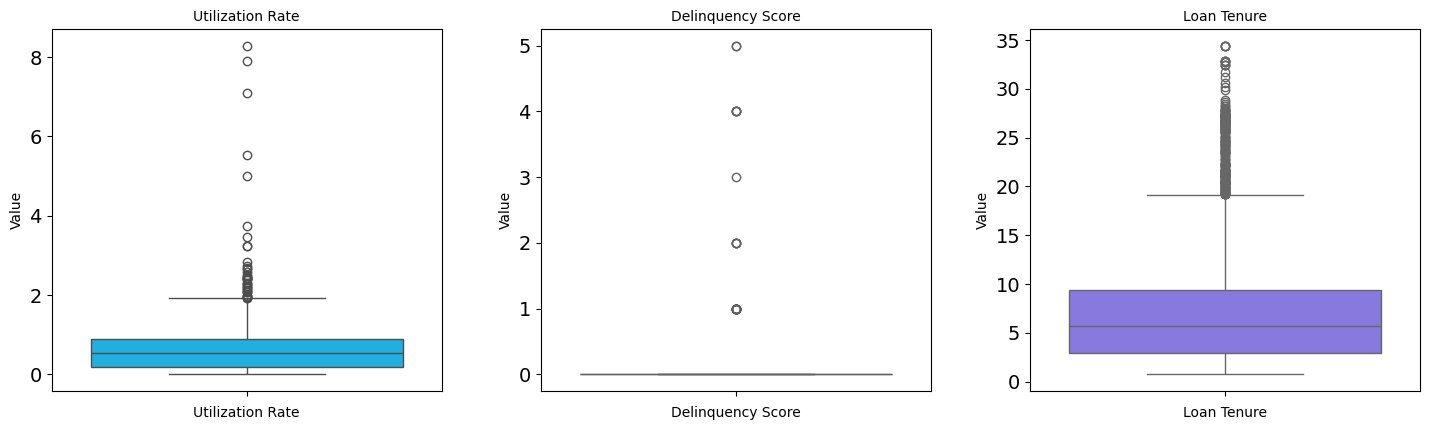

In [24]:
plt.figure(figsize=(15, 5))
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# 1. Utilization Rate
plt.subplot(1, 3, 1)
sns.boxplot(data=df_agg['util_rate'], color='deepskyblue')
plt.title('Utilization Rate', fontsize=10)
plt.xlabel('Utilization Rate', fontsize=10)
plt.ylabel('Value', fontsize=10)

# 2. Delinquency Score
plt.subplot(1, 3, 2)
sns.boxplot(data=df_agg['delinquency_score'], color='tomato')
plt.title('Delinquency Score', fontsize=10)
plt.xlabel('Delinquency Score', fontsize=10)
plt.ylabel('Value', fontsize=10)

# 3. Loan Tenure
plt.subplot(1, 3, 3)
sns.boxplot(data=df_agg['loan_tenure'], color='mediumslateblue')
plt.title('Loan Tenure', fontsize=10)
plt.xlabel('Loan Tenure', fontsize=10)
plt.ylabel('Value', fontsize=10)

plt.tight_layout()
plt.show()


In [25]:
non_outliers_df = df_agg.copy()

for col in cols_keep:
    COL_Q1 = non_outliers_df[col].quantile(0.25)
    COL_Q3 = non_outliers_df[col].quantile(0.75)
    COL_IQR = COL_Q3-COL_Q1

    lower_bound = COL_Q1 - 1.5*COL_IQR
    upper_bound = COL_Q3 + 1.5*COL_IQR

    non_outliers_df = non_outliers_df[(non_outliers_df[col] >= lower_bound) & (non_outliers_df[col] <= upper_bound)]

non_outliers_df

,credit_limit,tot_outstanding_bill,tot_cash_advance_trx,remaining_unpaid_balance,payment_ratio_avg,total_trx_per_limit,util_rate,delinquency_score,loan_tenure
1,10000000,523255,0,0,0.00,0.00,0.00,0,0.75
2,28000000,10928928,0,0,100.30,0.03,0.26,0,10.75
4,10000000,15501368,0,5951865,97.77,0.24,0.52,0,1.67
6,4000000,5949972,0,3314046,20.44,0.08,1.00,0,4.67
7,20000000,13226865,0,7881069,110.15,0.32,0.24,0,0.75
...,...,...,...,...,...,...,...,...,...
13164,3000000,5810074,0,2884290,10.38,0.04,0.85,0,1.67
13166,17000000,7016021,0,0,126.00,0.08,0.19,0,9.33
13167,6000000,103282,0,0,111.00,0.11,0.06,0,2.00
13168,4000000,517461,0,246512,57.04,0.09,0.49,0,3.83


## After outlier removal

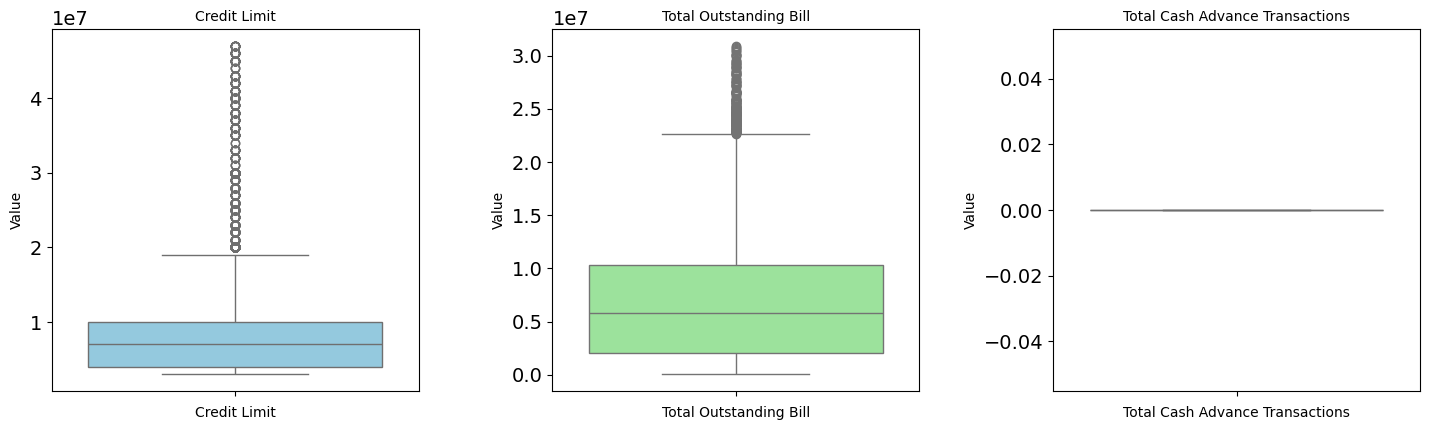

In [26]:

plt.figure(figsize=(15, 5))

# 1. Credit Limit
plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['credit_limit'], color='skyblue')
plt.title('Credit Limit', fontsize=10)
plt.xlabel('Credit Limit', fontsize=10)
plt.ylabel('Value', fontsize=10)

# 2. Total Outstanding Bill
plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['tot_outstanding_bill'], color='lightgreen')
plt.title('Total Outstanding Bill', fontsize=10)
plt.xlabel('Total Outstanding Bill', fontsize=10)
plt.ylabel('Value', fontsize=10)

# 3. Total Cash Advance Transactions
plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['tot_cash_advance_trx'], color='lightcoral')
plt.title('Total Cash Advance Transactions', fontsize=10)
plt.xlabel('Total Cash Advance Transactions', fontsize=10)
plt.ylabel('Value', fontsize=10)

plt.tight_layout()
plt.show()


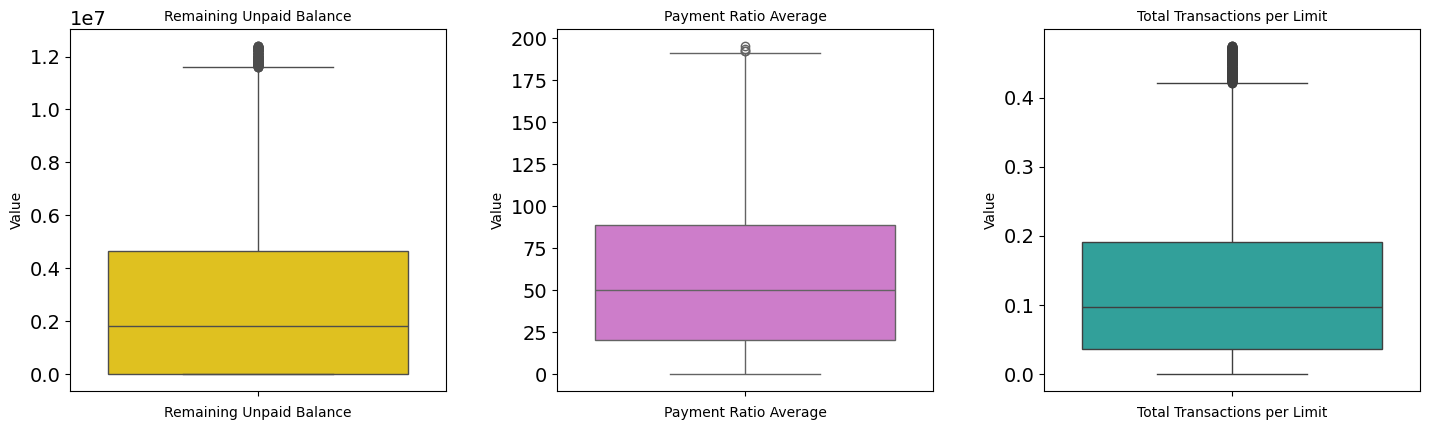

In [27]:
plt.figure(figsize=(15, 5))

# 4. Remaining Unpaid Balance
plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['remaining_unpaid_balance'], color='gold')
plt.title('Remaining Unpaid Balance', fontsize=10)
plt.xlabel('Remaining Unpaid Balance', fontsize=10)
plt.ylabel('Value', fontsize=10)

# 5. Payment Ratio Average
plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['payment_ratio_avg'], color='orchid')
plt.title('Payment Ratio Average', fontsize=10)
plt.xlabel('Payment Ratio Average', fontsize=10)
plt.ylabel('Value', fontsize=10)

# 6. Total Transactions per Limit
plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['total_trx_per_limit'], color='lightseagreen')
plt.title('Total Transactions per Limit', fontsize=10)
plt.xlabel('Total Transactions per Limit', fontsize=10)
plt.ylabel('Value', fontsize=10)

plt.tight_layout()
plt.show()


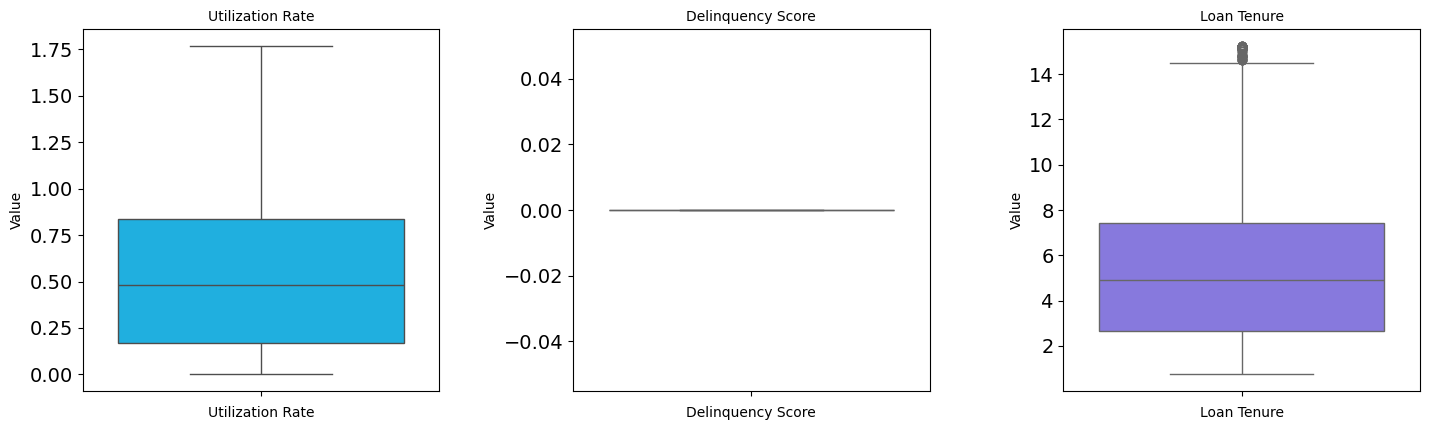

In [28]:
plt.figure(figsize=(15, 5))

# 7. Utilization Rate
plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['util_rate'], color='deepskyblue')
plt.title('Utilization Rate', fontsize=10)
plt.xlabel('Utilization Rate', fontsize=10)
plt.ylabel('Value', fontsize=10)

# 8. Delinquency Score
plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['delinquency_score'], color='tomato')
plt.title('Delinquency Score', fontsize=10)
plt.xlabel('Delinquency Score', fontsize=10)
plt.ylabel('Value', fontsize=10)

# 9. Loan Tenure
plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['loan_tenure'], color='mediumslateblue')
plt.title('Loan Tenure', fontsize=10)
plt.xlabel('Loan Tenure', fontsize=10)
plt.ylabel('Value', fontsize=10)

plt.tight_layout()
plt.show()


In [29]:
non_outliers_df[["tot_cash_advance_trx", "delinquency_score"]] = df_agg[["tot_cash_advance_trx", "delinquency_score"]] 

In [30]:
non_outliers_df

,credit_limit,tot_outstanding_bill,tot_cash_advance_trx,remaining_unpaid_balance,payment_ratio_avg,total_trx_per_limit,util_rate,delinquency_score,loan_tenure
1,10000000,523255,0,0,0.00,0.00,0.00,0,0.75
2,28000000,10928928,0,0,100.30,0.03,0.26,0,10.75
4,10000000,15501368,0,5951865,97.77,0.24,0.52,0,1.67
6,4000000,5949972,0,3314046,20.44,0.08,1.00,0,4.67
7,20000000,13226865,0,7881069,110.15,0.32,0.24,0,0.75
...,...,...,...,...,...,...,...,...,...
13164,3000000,5810074,0,2884290,10.38,0.04,0.85,0,1.67
13166,17000000,7016021,0,0,126.00,0.08,0.19,0,9.33
13167,6000000,103282,0,0,111.00,0.11,0.06,0,2.00
13168,4000000,517461,0,246512,57.04,0.09,0.49,0,3.83


## Modelling

In [31]:
import numpy as np
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics           import (
    roc_auc_score, precision_recall_curve, auc,
    classification_report, confusion_matrix, RocCurveDisplay
)

from sklearn.inspection        import permutation_importance


from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.pipeline          import Pipeline, FeatureUnion
from sklearn.compose           import ColumnTransformer
from sklearn.preprocessing     import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.metrics           import (
    roc_auc_score, precision_recall_curve, auc,
    classification_report, confusion_matrix, RocCurveDisplay
)
from sklearn.ensemble          import RandomForestClassifier
from sklearn.inspection        import permutation_importance


In [32]:
model_df = non_outliers_df.copy()
model_df

,credit_limit,tot_outstanding_bill,tot_cash_advance_trx,remaining_unpaid_balance,payment_ratio_avg,total_trx_per_limit,util_rate,delinquency_score,loan_tenure
1,10000000,523255,0,0,0.00,0.00,0.00,0,0.75
2,28000000,10928928,0,0,100.30,0.03,0.26,0,10.75
4,10000000,15501368,0,5951865,97.77,0.24,0.52,0,1.67
6,4000000,5949972,0,3314046,20.44,0.08,1.00,0,4.67
7,20000000,13226865,0,7881069,110.15,0.32,0.24,0,0.75
...,...,...,...,...,...,...,...,...,...
13164,3000000,5810074,0,2884290,10.38,0.04,0.85,0,1.67
13166,17000000,7016021,0,0,126.00,0.08,0.19,0,9.33
13167,6000000,103282,0,0,111.00,0.11,0.06,0,2.00
13168,4000000,517461,0,246512,57.04,0.09,0.49,0,3.83


In [33]:
model_df["good_bad_flag"] = df_cleaned["good_bad_flag"]

In [34]:
X = model_df.drop(columns="good_bad_flag")
y = model_df["good_bad_flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

In [35]:
numeric_cols   = (model_df.select_dtypes(include=np.number)
                             .columns
                             .drop(["good_bad_flag"])
                             .tolist())


In [36]:
preprocess = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols)
])

preprocess

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['credit_limit', 'tot_outstanding_bill',
                                  'tot_cash_advance_trx',
                                  'remaining_unpaid_balance',
                                  'payment_ratio_avg', 'total_trx_per_limit',
                                  'util_rate', 'delinquency_score',
                                  'loan_tenure'])])

In [37]:
lr = LogisticRegression(max_iter=1000)

model = Pipeline([
    ("preprocess", preprocess),
    ("LR", lr)
])

In [38]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['credit_limit',
                                                   'tot_outstanding_bill',
                                                   'tot_cash_advance_trx',
                                                   'remaining_unpaid_balance',
                                                   'payment_ratio_avg',
                                                   'total_trx_per_limit',
                                                   'util_rate',
                                                   'delinquency_score',
                                                   'loan_tenure'])])),
                ('LR', LogisticRegression(max_iter=1000))])


Test-set metrics
----------------
ROC-AUC : 0.7390
PR-AUC  : 0.1981

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1541
           1       0.00      0.00      0.00       136

    accuracy                           0.92      1677
   macro avg       0.46      0.50      0.48      1677
weighted avg       0.84      0.92      0.88      1677

Confusion matrix:
 [[1541    0]
 [ 136    0]]


C:\Users\sugiama\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sugiama\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sugiama\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


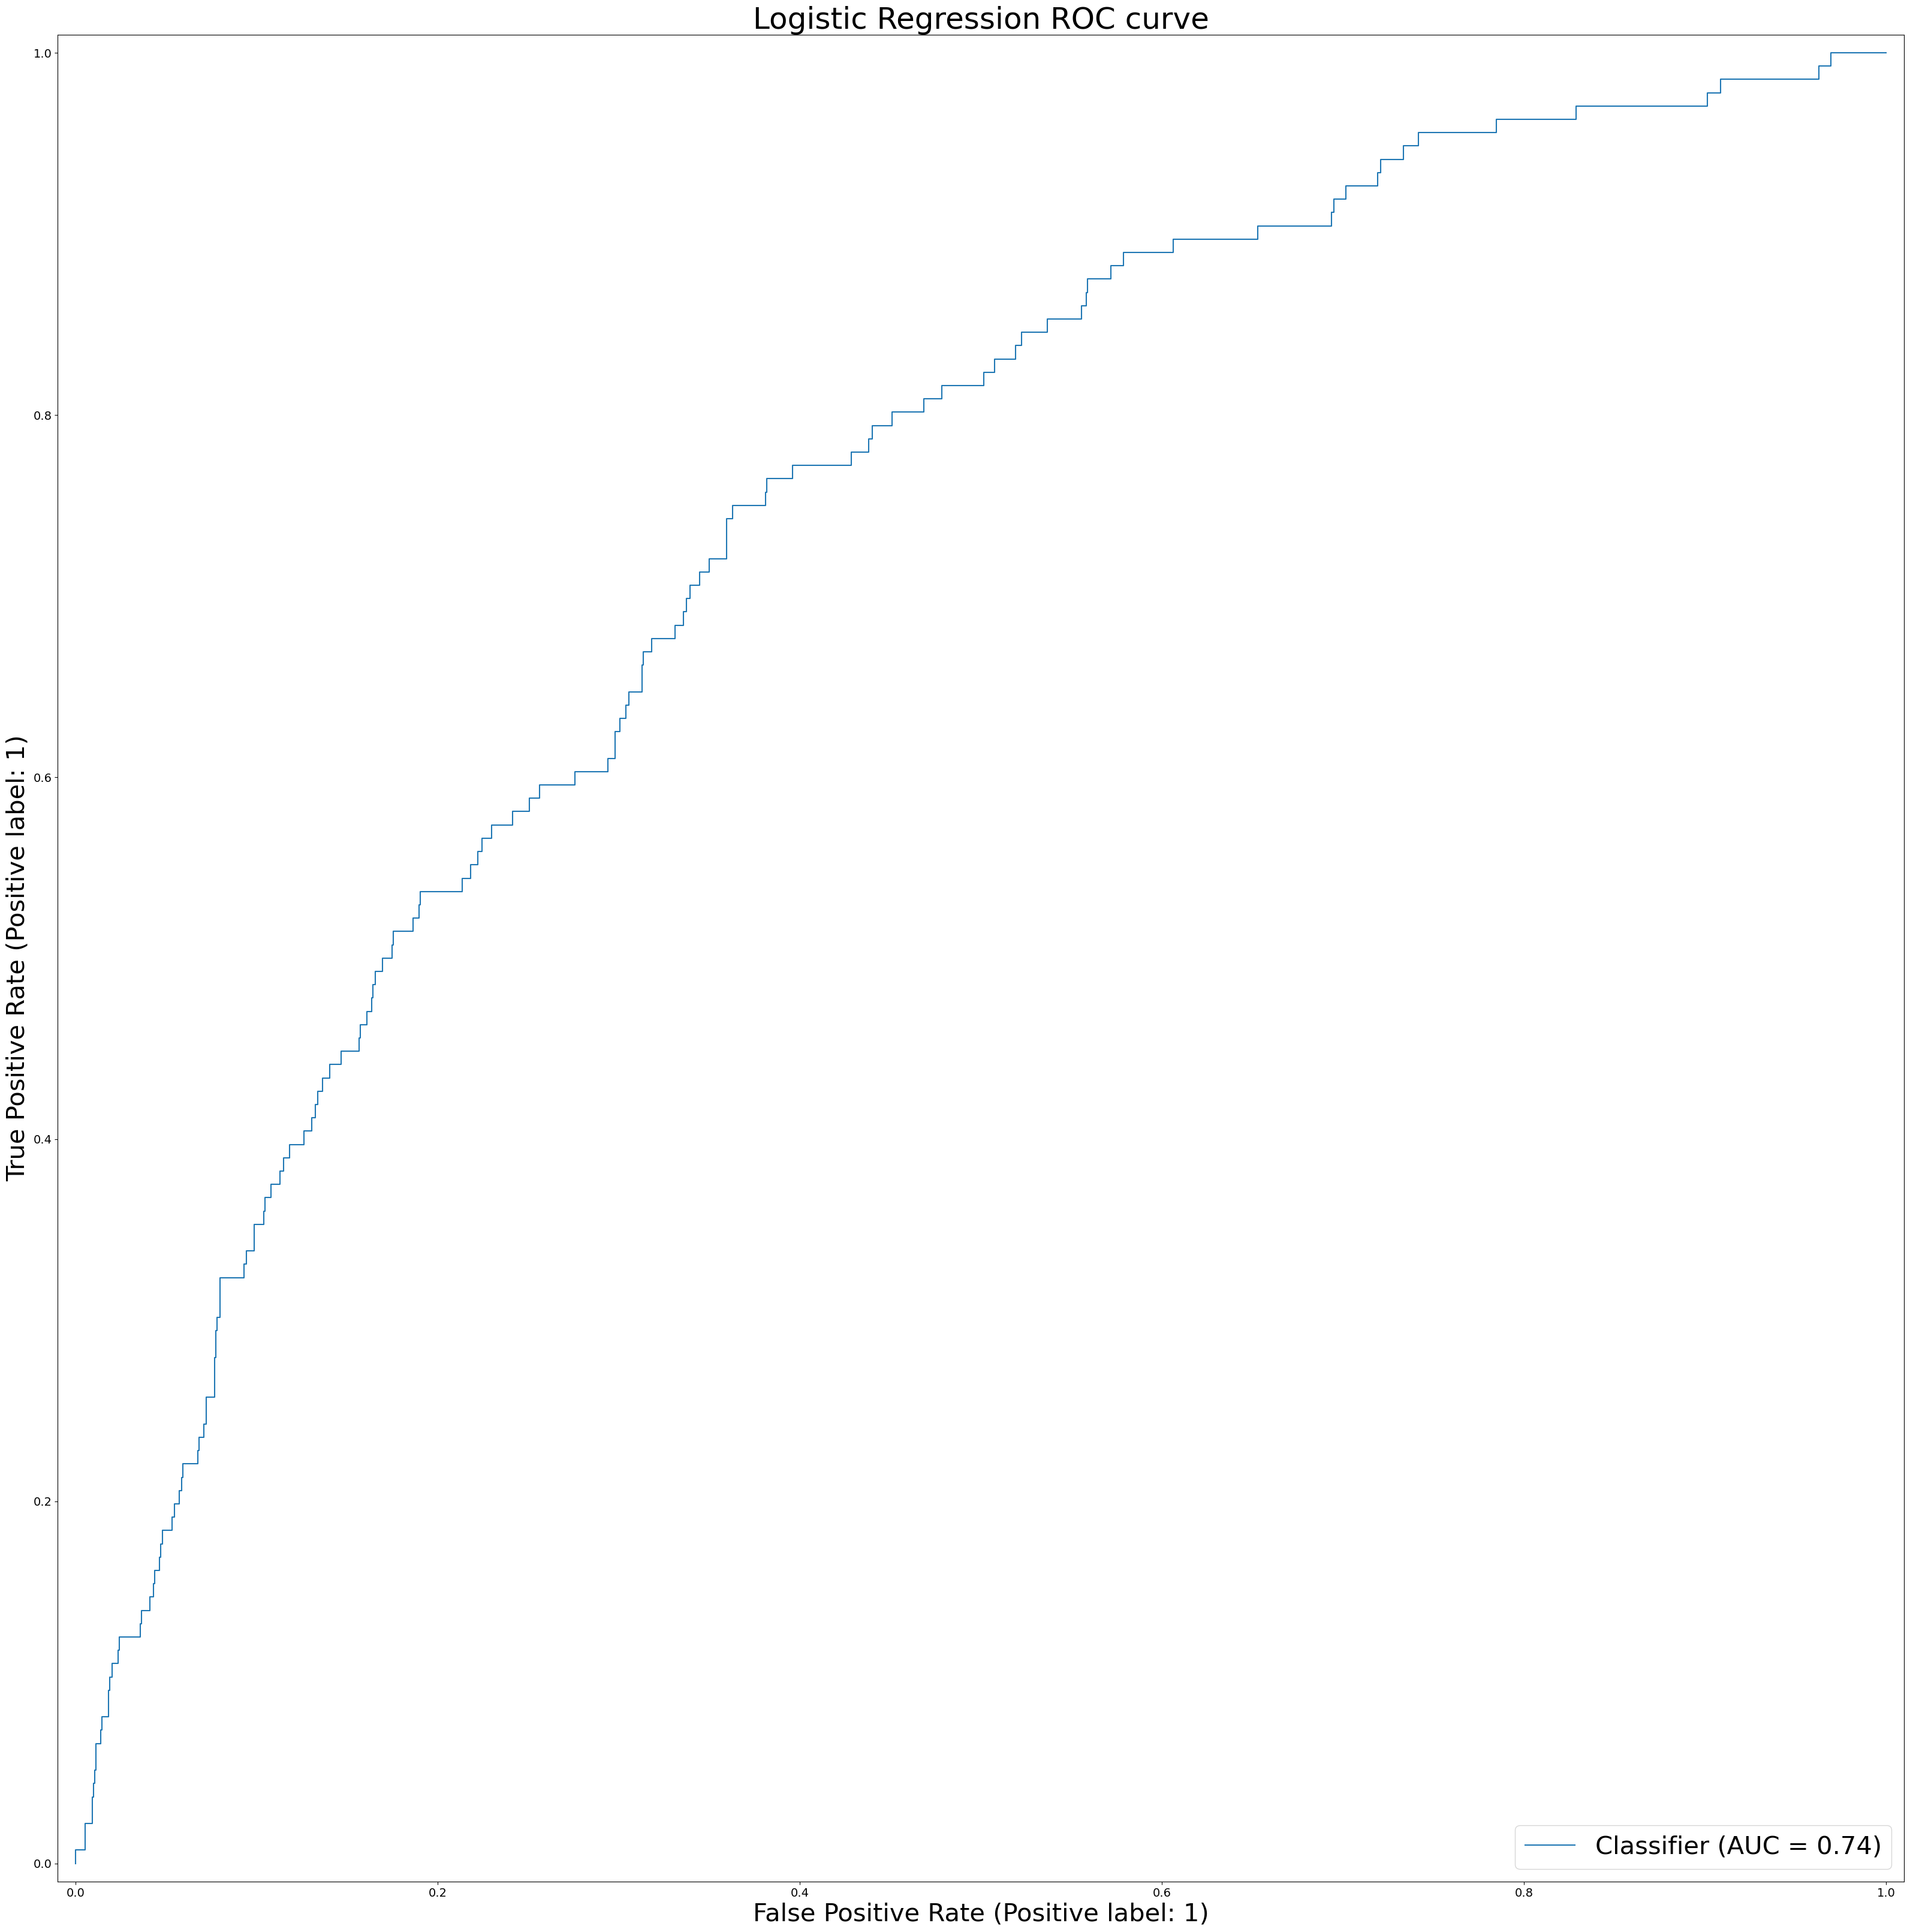

In [39]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_label = model.predict(X_test)

print("\nTest-set metrics")
print("----------------")
print(f"ROC-AUC : {roc_auc_score(y_test, y_pred_proba):.4f}")

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
print(f"PR-AUC  : {auc(recall, precision):.4f}\n")

print(classification_report(y_test, y_pred_label))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_label))

RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Logistic Regression ROC curve"); plt.show()

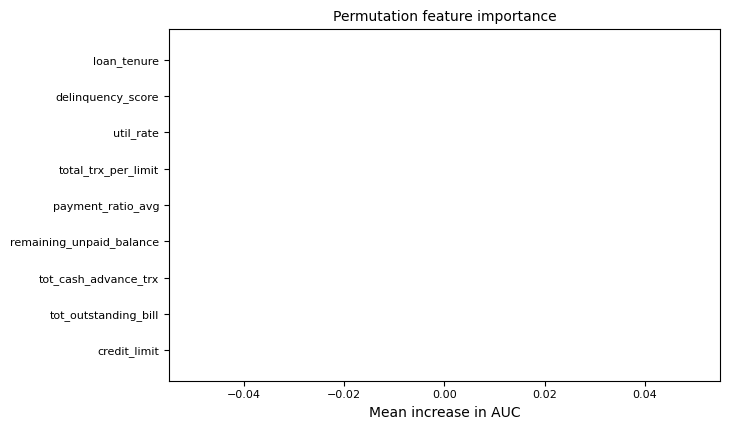

In [40]:

imp = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Determine top features
n_feats = imp.importances_mean.shape[0]
top_k = min(15, n_feats)
sorted_idx = np.argsort(np.abs(imp.importances_mean))[::-1][:top_k]

# Plot permutation importances as positive values
plt.figure(figsize=(8, 5))
plt.barh(range(top_k)[::-1], np.abs(imp.importances_mean[sorted_idx]))
plt.yticks(range(top_k)[::-1], np.array(X_test.columns)[sorted_idx], fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel("Mean increase in AUC", fontsize=10)
plt.title("Permutation feature importance", fontsize=10)
plt.tight_layout()
plt.show()


In [41]:
print(imp.importances_mean)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Random Forest

In [42]:
rf = RandomForestClassifier(
    n_estimators = 400,
    class_weight = 'balanced',
    n_jobs = -1,
    random_state = 42
)

model = Pipeline([
    ("preprocess", preprocess),
    ("rf", rf)
])

In [43]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['credit_limit',
                                                   'tot_outstanding_bill',
                                                   'tot_cash_advance_trx',
                                                   'remaining_unpaid_balance',
                                                   'payment_ratio_avg',
                                                   'total_trx_per_limit',
                                                   'util_rate',
                                                   'delinquency_score',
                                                   'loan_tenure'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, n_jobs=-1,
                                        random_state=42))])


Test-set metrics
----------------
ROC-AUC : 0.7899
PR-AUC  : 0.2864

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1541
           1       0.61      0.08      0.14       136

    accuracy                           0.92      1677
   macro avg       0.77      0.54      0.55      1677
weighted avg       0.90      0.92      0.89      1677

Confusion matrix:
 [[1534    7]
 [ 125   11]]


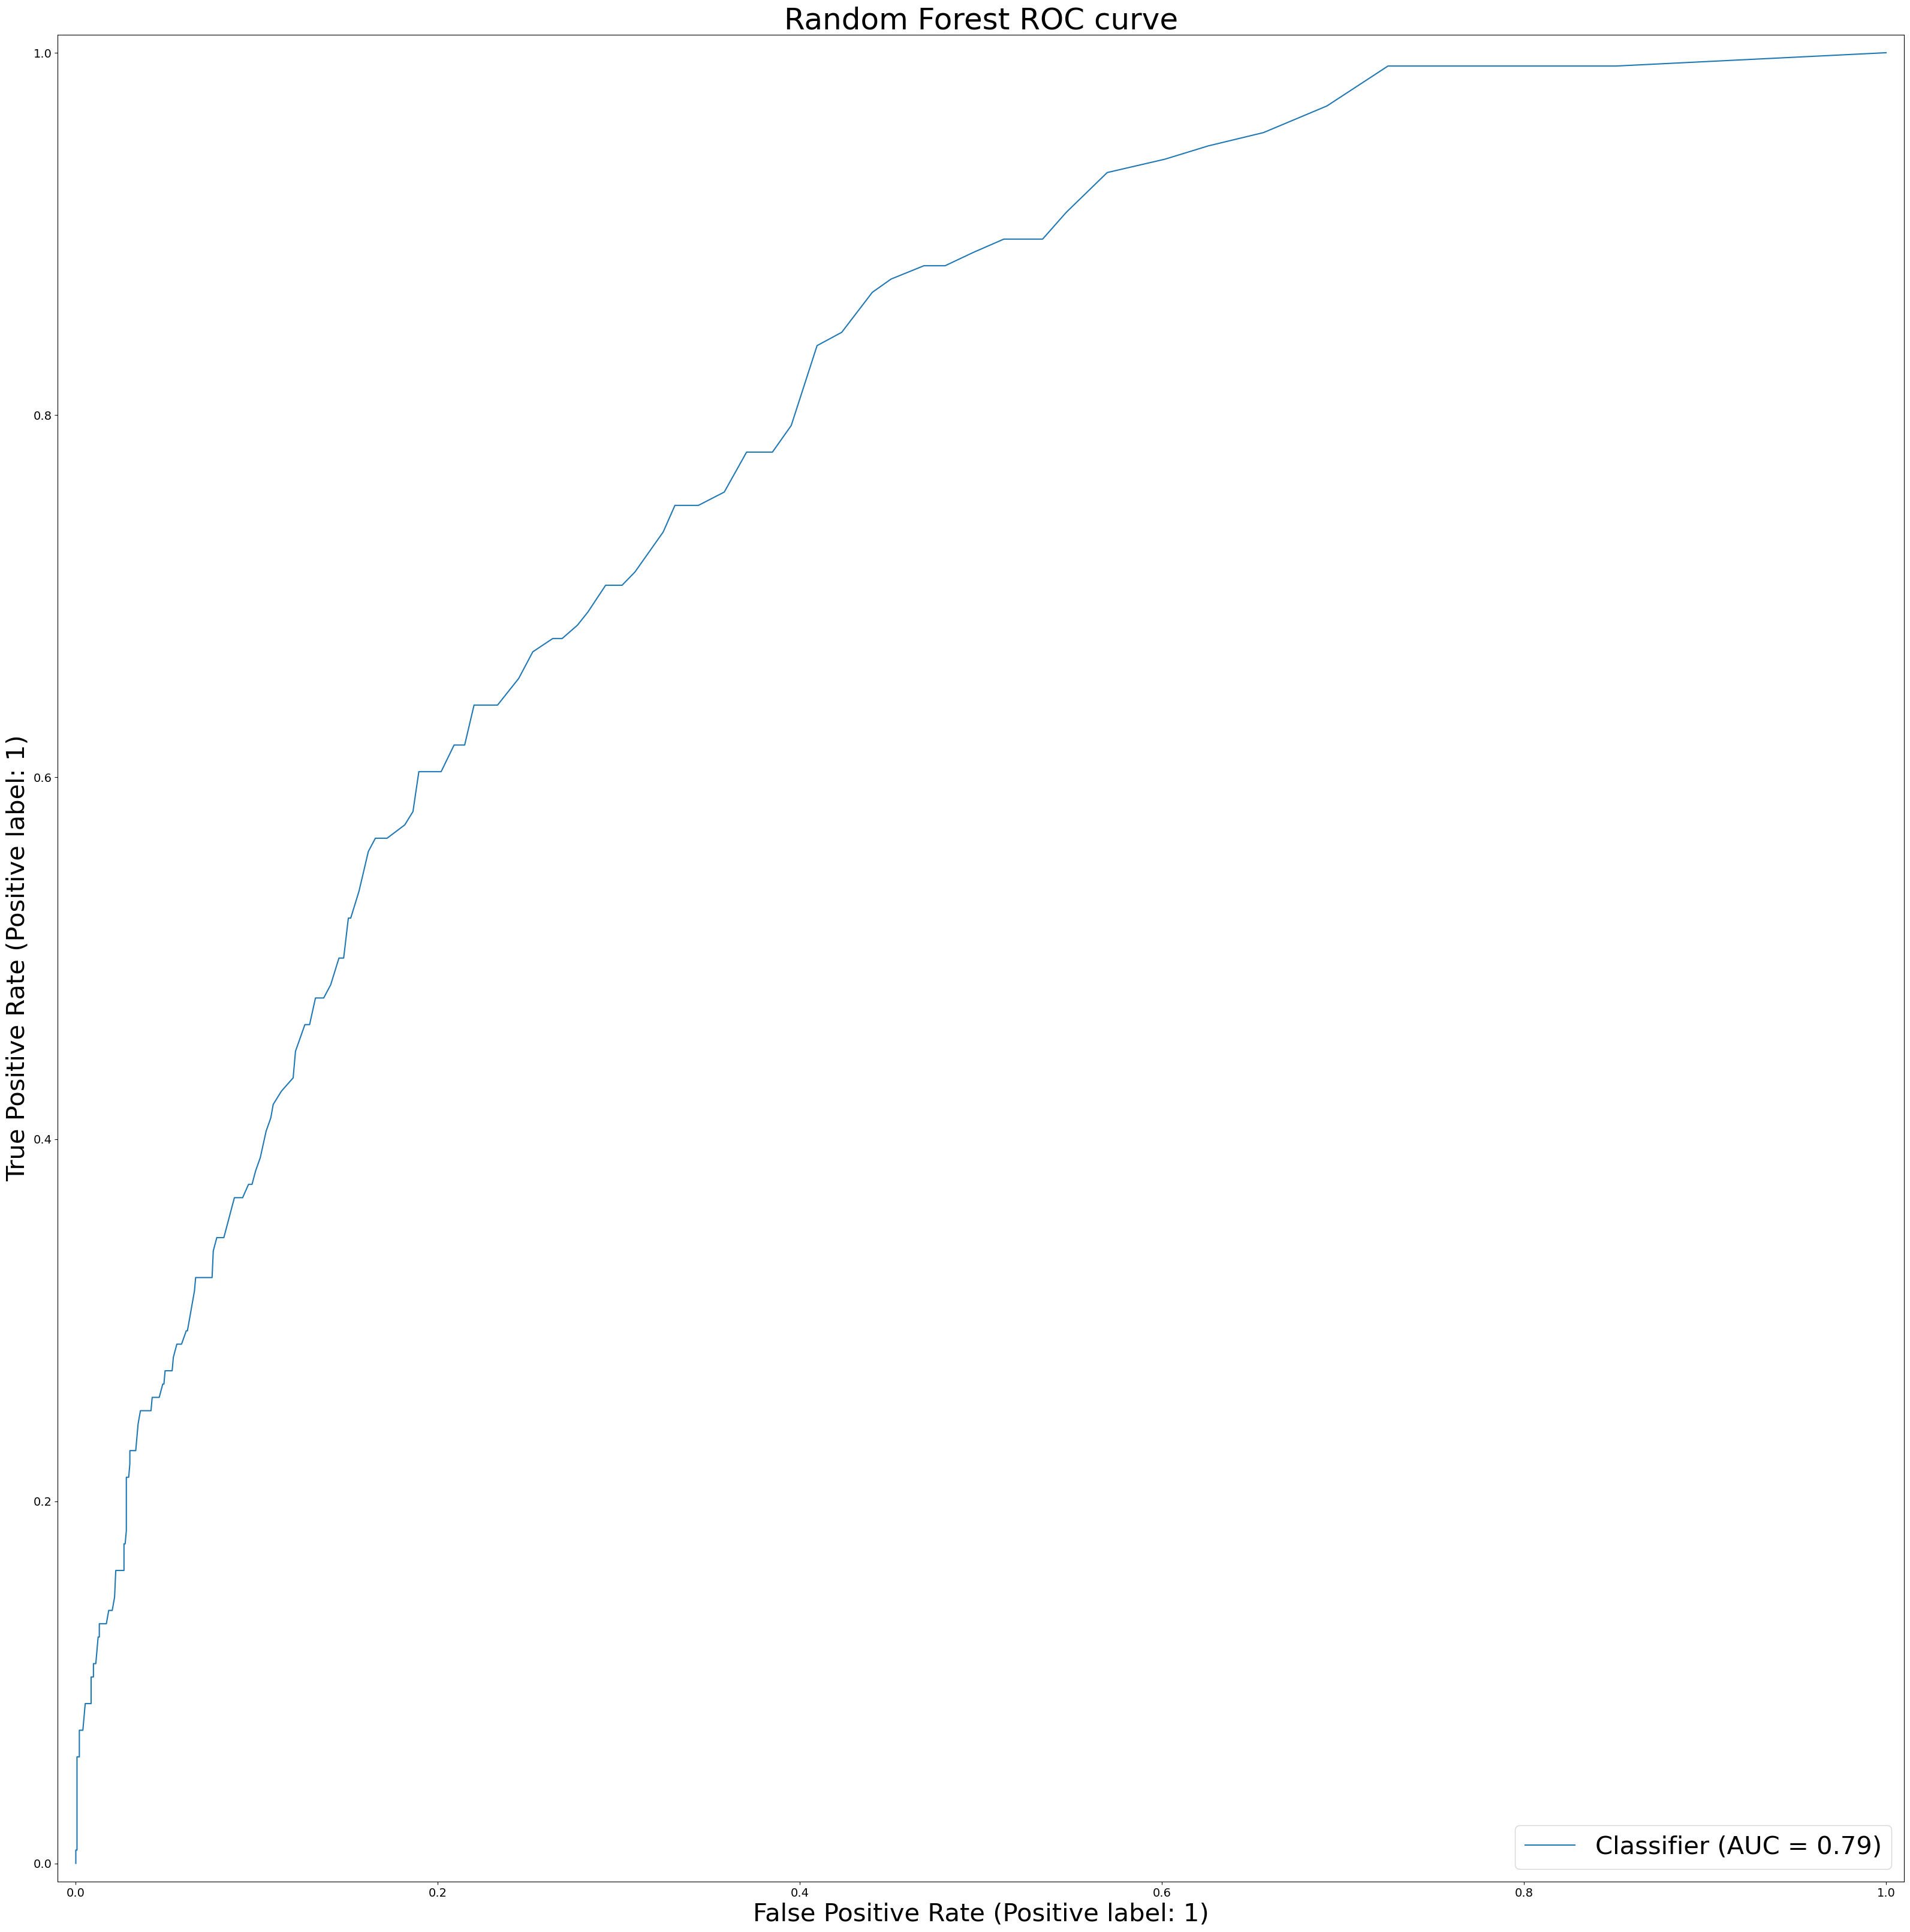

In [44]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_label = model.predict(X_test)

print("\nTest-set metrics")
print("----------------")
print(f"ROC-AUC : {roc_auc_score(y_test, y_pred_proba):.4f}")

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
print(f"PR-AUC  : {auc(recall, precision):.4f}\n")

print(classification_report(y_test, y_pred_label))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_label))

RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Random Forest ROC curve"); plt.show()


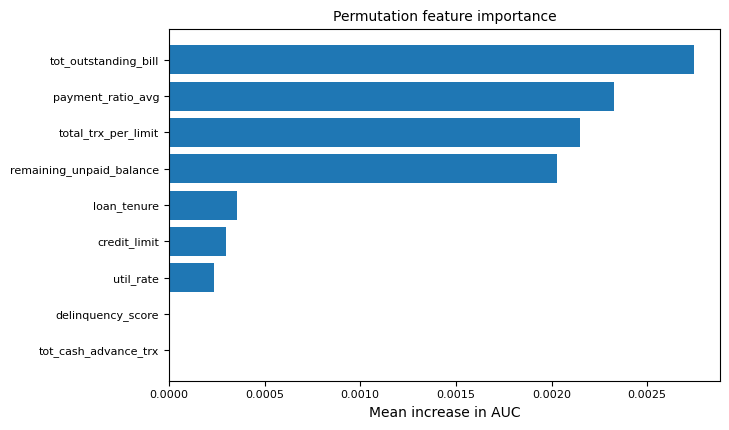

In [45]:

imp = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Determine top features
n_feats = imp.importances_mean.shape[0]
top_k = min(15, n_feats)
sorted_idx = np.argsort(np.abs(imp.importances_mean))[::-1][:top_k]

# Plot permutation importances as positive values
plt.figure(figsize=(8, 5))
plt.barh(range(top_k)[::-1], np.abs(imp.importances_mean[sorted_idx]))
plt.yticks(range(top_k)[::-1], np.array(X_test.columns)[sorted_idx], fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel("Mean increase in AUC", fontsize=10)
plt.title("Permutation feature importance", fontsize=10)
plt.tight_layout()
plt.show()


In [46]:
print(imp.importances_mean)

[-0.00029815  0.00274299  0.          0.00202743  0.00232558  0.00214669
  0.00023852  0.         -0.00035778]


## XGBoost

In [47]:
! pip install xgboost

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)


In [48]:
import xgboost
from xgboost import XGBClassifier

# Define your XGBoost model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss'
)

# Create the pipeline
model = Pipeline([
    ("preprocess", preprocess),
    ("xgb", xgb)])


In [49]:
model.fit(X_train, y_train)

C:\Users\sugiama\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:33:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['credit_limit',
                                                   'tot_outstanding_bill',
                                                   'tot_cash_advance_trx',
                                                   'remaining_unpaid_balance',
                                                   'payment_ratio_avg',
                                                   'total_trx_per_limit',
                                                   'util_rate',
                                                   'delinquency_score',
                                                   'loan_tenure'])])),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])


Test-set metrics
----------------
ROC-AUC : 0.7995
PR-AUC  : 0.3328

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1541
           1       0.70      0.10      0.18       136

    accuracy                           0.92      1677
   macro avg       0.81      0.55      0.57      1677
weighted avg       0.91      0.92      0.90      1677

Confusion matrix:
 [[1535    6]
 [ 122   14]]


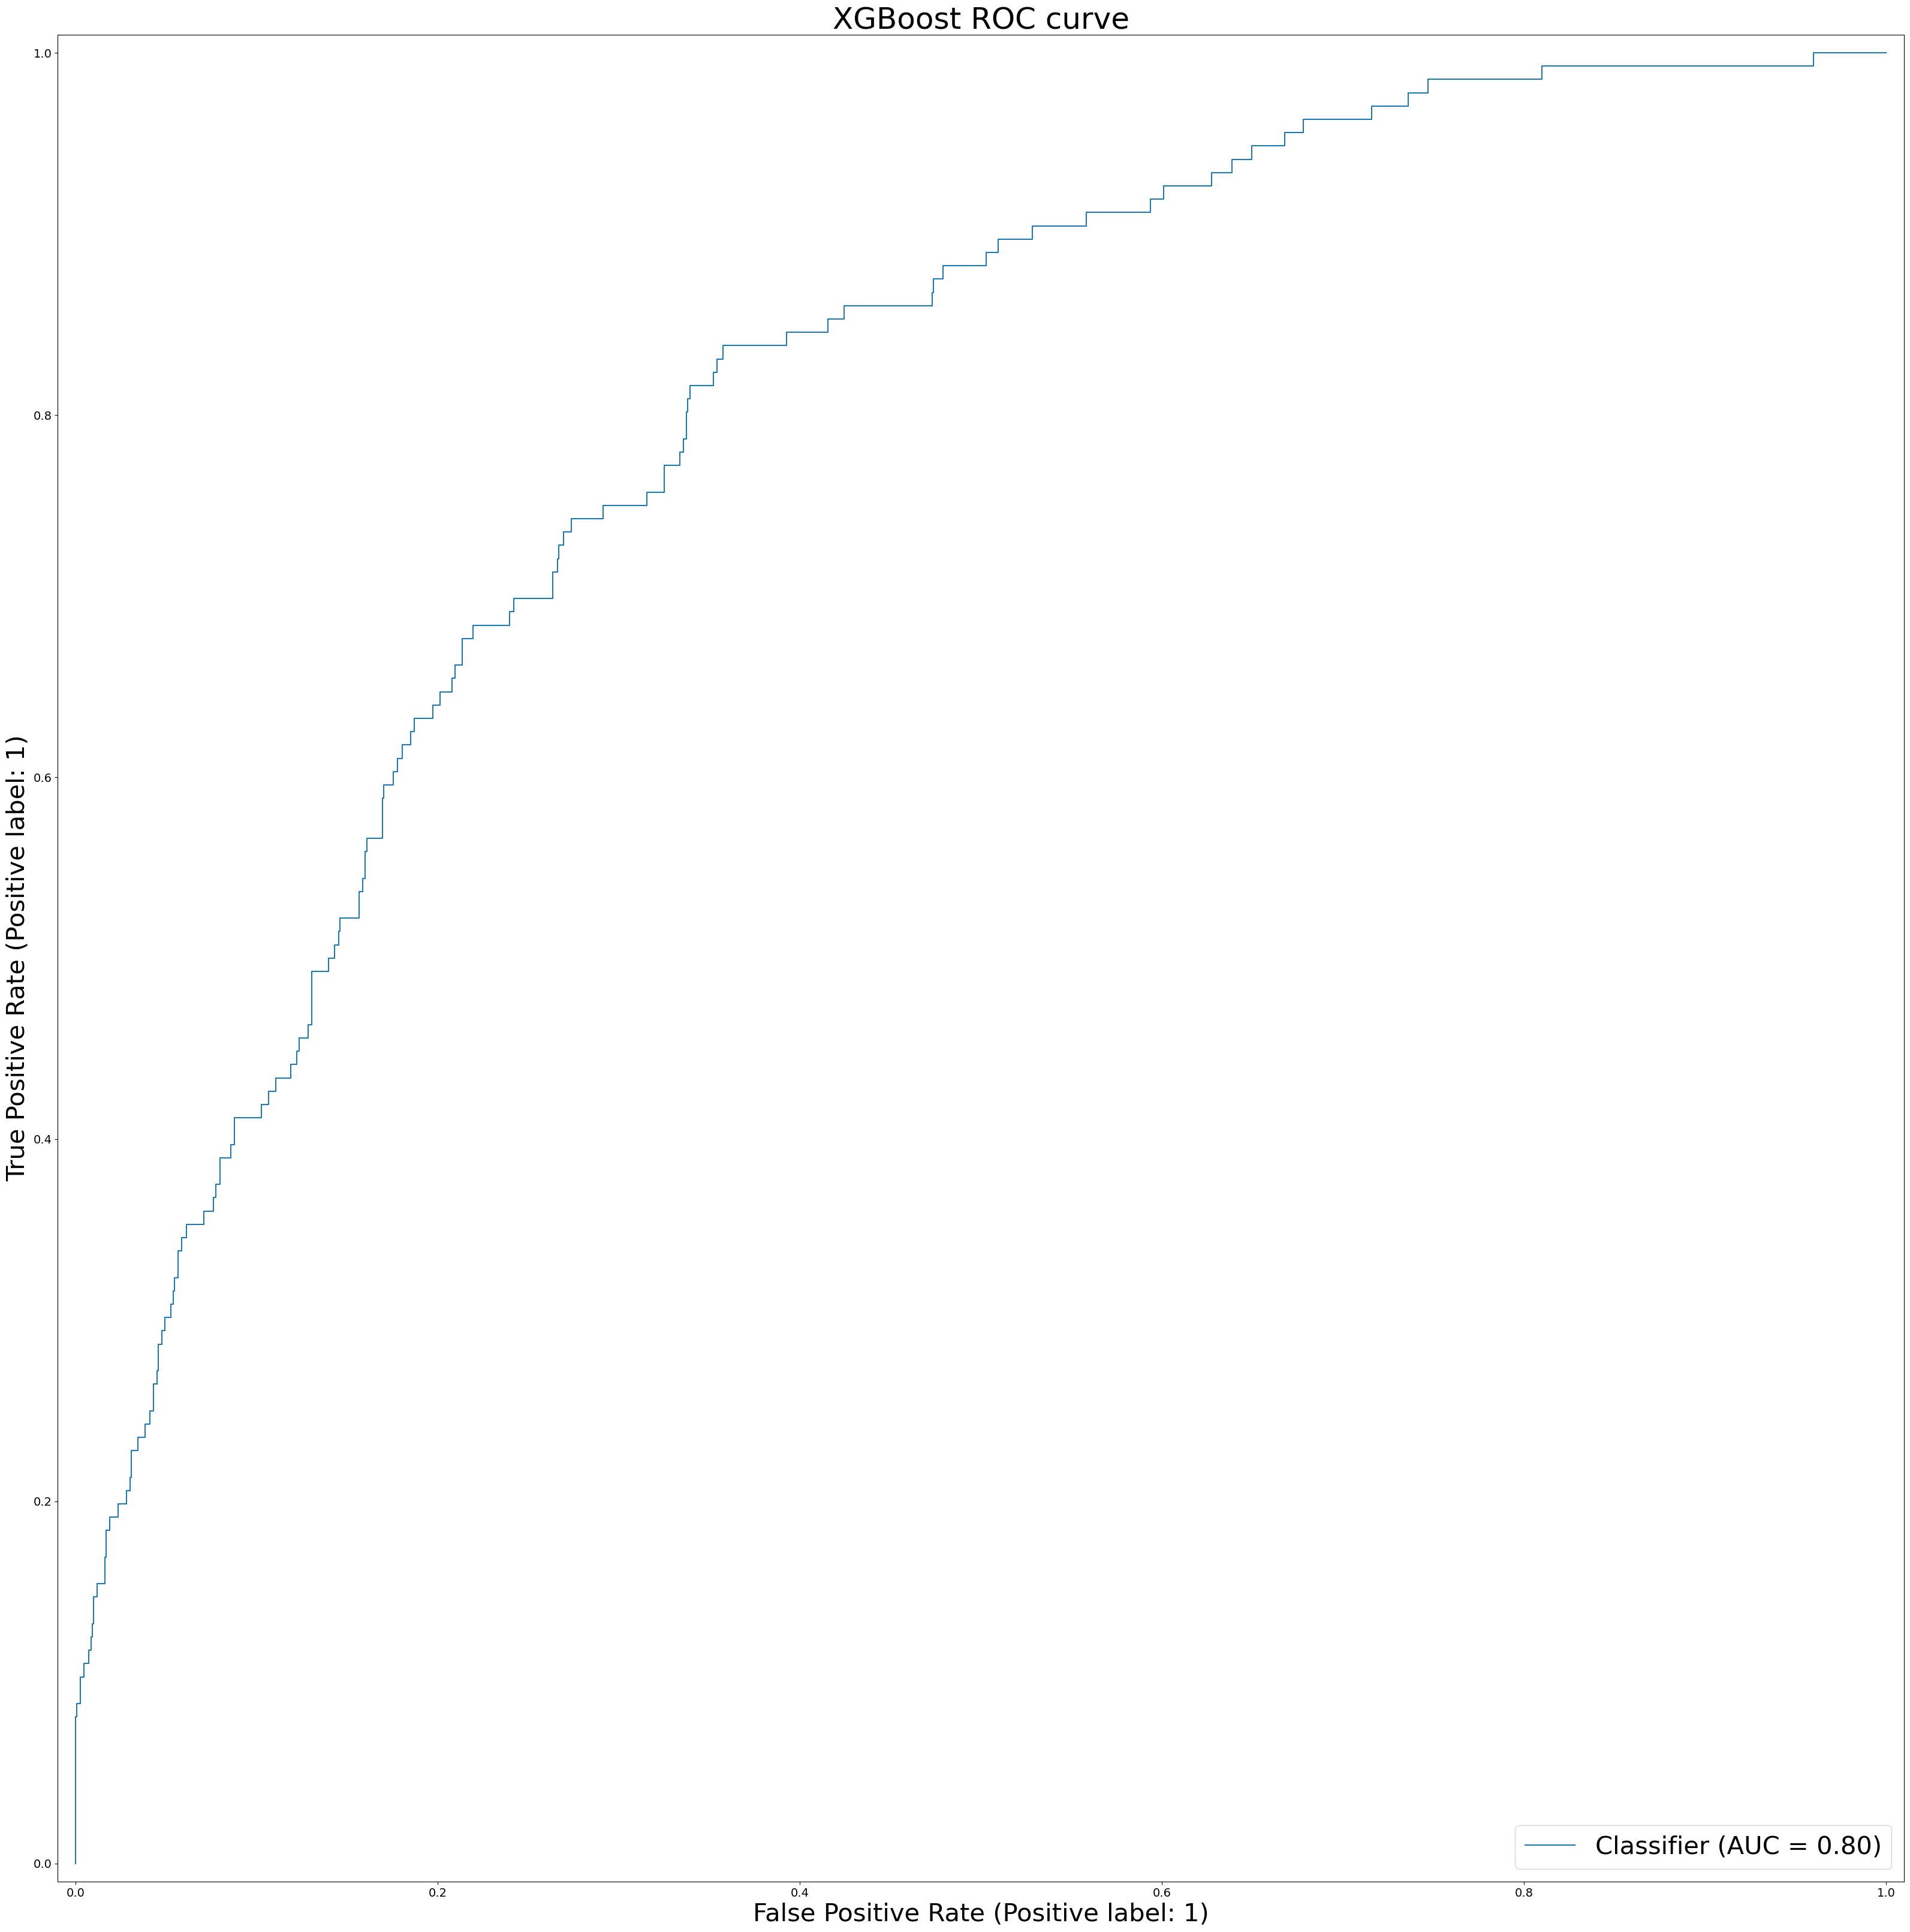

In [52]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_label = model.predict(X_test)

print("\nTest-set metrics")
print("----------------")
print(f"ROC-AUC : {roc_auc_score(y_test, y_pred_proba):.4f}")

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
print(f"PR-AUC  : {auc(recall, precision):.4f}\n")

print(classification_report(y_test, y_pred_label))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_label))

RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("XGBoost ROC curve"); plt.show()


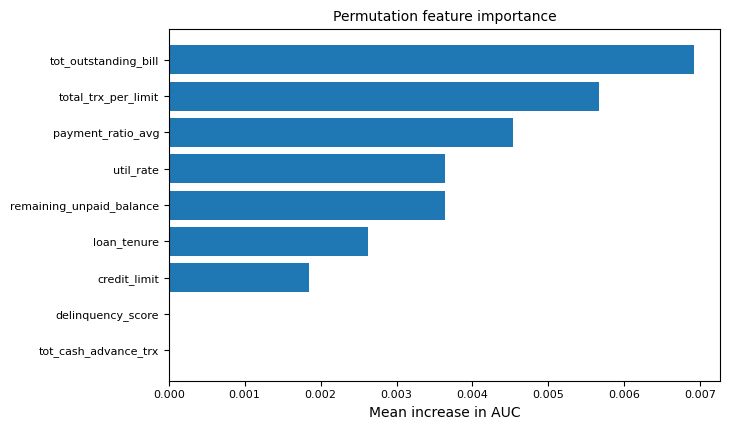

In [51]:

imp = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Determine top features
n_feats = imp.importances_mean.shape[0]
top_k = min(15, n_feats)
sorted_idx = np.argsort(np.abs(imp.importances_mean))[::-1][:top_k]

# Plot permutation importances as positive values
plt.figure(figsize=(8, 5))
plt.barh(range(top_k)[::-1], np.abs(imp.importances_mean[sorted_idx]))
plt.yticks(range(top_k)[::-1], np.array(X_test.columns)[sorted_idx], fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel("Mean increase in AUC", fontsize=10)
plt.title("Permutation feature importance", fontsize=10)
plt.tight_layout()
plt.show()
